# Bangla Character Recognition

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [3]:
ImageFile.LOAD_TRUNCATED_IMAGES = True #loading image is permitted only in plain black rectangles

#Loading train and test data

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = .2,rotation_range = 25)
                                    #rescale 1./255 is used to transform pixel value from (0,255) to (0,1)
                                    #shear_range=0.2 means shear the image by 20%
                                    #using rotation_range images are allowed to rotate 0 to 360 degree
test_datagen = ImageDataGenerator(rescale=1./255)

train_data=train_datagen.flow_from_directory('Dataset/Train',target_size=(40,40),batch_size=32,class_mode='categorical')
                                    #size of input image will be 40*40
                                    #32 samples will be propagated through the network at a time
                                    #categorical->a character can't be from two classes
test_data=test_datagen.flow_from_directory('Dataset/Test',target_size=(40,40),batch_size=32,class_mode='categorical')

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [ ]:
import keras
from keras.models import Sequential #create models layer-by-layer
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

classifier=Sequential() #for sequential model

classifier.add(Conv2D(filters=128,kernel_size = (3,3),activation = 'relu',input_shape = (40,40,3)))
                    #kernel_size specifying the height and width of the 2D convolution window
                    #relu activation output the input directly if it is positive, otherwise, it will output zero RELU(x) = max(0,x)
                    #input_shape The ordering of the dimensions in the inputs (height, width, channels)
classifier.add(MaxPooling2D(pool_size = (2,2)))
                    #maxpooling downsamples the input by taking the maximum value over an input window
classifier.add(Dropout(.2))
                    #dropout used to prevent a model from overfitting.It's value should be in between 0 to .2
classifier.add(Conv2D(filters=64,kernel_size = (3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(.2))

classifier.add(Flatten()) #converts multidimension input into single dimension

classifier.add(Dense(units = 128,activation='relu'))
                        #Dense Layer is used to classify image based on output from convolutional layers
classifier.add(Dropout(.2))
                #dropout layer ignores a set of neurons(randomly) to prevent the net from overfitting

classifier.add(Dense(units = 50,activation='softmax'))
                #to normalize the output of a network to a probability

classifier.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])
                 #optimize the best result according to accuracy


In [32]:
classifier.fit_generator(train_data,steps_per_epoch=374,epochs=500,validation_data=test_data,validation_steps=374)

Epoch 1/500


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


374/374 [==============================] - 47s 126ms/step - loss: 0.6195 - accuracy: 0.8095 - val_loss: 0.4277 - val_accuracy: 0.8743
Epoch 2/500
374/374 [==============================] - 47s 126ms/step - loss: 0.6040 - accuracy: 0.8131
Epoch 3/500
374/374 [==============================] - 47s 126ms/step - loss: 0.5731 - accuracy: 0.8224
Epoch 4/500
374/374 [==============================] - 47s 127ms/step - loss: 0.5686 - accuracy: 0.8196
Epoch 5/500
374/374 [==============================] - 48s 128ms/step - loss: 0.5451 - accuracy: 0.8313
Epoch 6/500
374/374 [==============================] - 47s 126ms/step - loss: 0.5228 - accuracy: 0.8349
Epoch 7/500
374/374 [==============================] - 47s 126ms/step - loss: 0.5155 - accuracy: 0.8381
Epoch 8/500
374/374 [==============================] - 47s 126ms/step - loss: 0.4913 - accuracy: 0.8419
Epoch 9/500
374/374 [==============================] - 48s 128ms/step - loss: 0.4898 - accuracy: 0.8422
Epoch 10/500
374/374 [============

374/374 [==============================] - 47s 125ms/step - loss: 0.1760 - accuracy: 0.9423
Epoch 153/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1907 - accuracy: 0.9374
Epoch 154/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1953 - accuracy: 0.9370
Epoch 155/500
374/374 [==============================] - 47s 126ms/step - loss: 0.1806 - accuracy: 0.9393
Epoch 156/500
374/374 [==============================] - 47s 126ms/step - loss: 0.1916 - accuracy: 0.9384
Epoch 157/500
374/374 [==============================] - 47s 126ms/step - loss: 0.1853 - accuracy: 0.9394
Epoch 158/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1972 - accuracy: 0.9360
Epoch 159/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1967 - accuracy: 0.9402
Epoch 160/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1881 - accuracy: 0.9379
Epoch 161/500
374/374 [==============================] - 47s

374/374 [==============================] - 47s 125ms/step - loss: 0.1521 - accuracy: 0.9522
Epoch 307/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1527 - accuracy: 0.9505
Epoch 308/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1551 - accuracy: 0.9498
Epoch 309/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1352 - accuracy: 0.9554
Epoch 310/500
374/374 [==============================] - 47s 126ms/step - loss: 0.1529 - accuracy: 0.9516
Epoch 311/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1488 - accuracy: 0.9512
Epoch 312/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1419 - accuracy: 0.9550
Epoch 313/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1520 - accuracy: 0.9530
Epoch 314/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1342 - accuracy: 0.9586
Epoch 315/500
374/374 [==============================] - 47s

374/374 [==============================] - 47s 125ms/step - loss: 0.1283 - accuracy: 0.9606
Epoch 461/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1246 - accuracy: 0.9609
Epoch 462/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1375 - accuracy: 0.9588
Epoch 463/500
374/374 [==============================] - 47s 126ms/step - loss: 0.1382 - accuracy: 0.9552
Epoch 464/500
374/374 [==============================] - 47s 126ms/step - loss: 0.1310 - accuracy: 0.9563
Epoch 465/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1373 - accuracy: 0.9541
Epoch 466/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1240 - accuracy: 0.9620
Epoch 467/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1280 - accuracy: 0.9581
Epoch 468/500
374/374 [==============================] - 47s 125ms/step - loss: 0.1241 - accuracy: 0.9593
Epoch 469/500
374/374 [==============================] - 47s

In [33]:
#Saving the model 
classifier_json=classifier.to_json() #to_json() function is used to convert the object to a JSON string

with open("BanglaCharacterRecognization.json","w") as json_file:
    json_file.write(classifier_json)

classifier.save_weights("BanglaCharacterRecognization.h5")
print("Saved Model")

Saved Model


In [34]:
import PIL
import tkinter
from PIL import ImageTk, ImageDraw, Image
from tkinter import*
from keras.preprocessing import image
import os


In [110]:
'''
def create_new_image():
    width=256
    height=256
    center=height
    white=(255,255,255)
    green=(0,128,0)
    
    def save():
        filename='C:/Users/HP/Dataset/SinglePrediction/image.jpg'
        image.save(filename)
        
    def paint(event):
        x1,y1=(event.x-1),(event.y-1)
        x2,y2=(event.x+1),(event.y+1)
        cv.create_oval(x1,y1,x2,y2,fill='black',width=20)
        draw.line([x1,y1,x2,y2],fill='black',width=20)
    
    root=Tk()
    
    cv=Canvas(root,width=width,height=height,bg='white')
    cv.pack()
    
    image=PIL.Image.new('RGB',(width,height),white)
    draw=ImageDraw.Draw(image)
    
    cv.pack(expand= YES,fill=BOTH)
    cv.bind("<B1-Motion>",paint)
    
    button=Button(text='Save',command=save)
    button.pack()
    
    root.mainloop();
    
 '''

'\ndef create_new_image():\n    width=256\n    height=256\n    center=height\n    white=(255,255,255)\n    green=(0,128,0)\n    \n    def save():\n        filename=\'C:/Users/HP/Dataset/SinglePrediction/image.jpg\'\n        image.save(filename)\n        \n    def paint(event):\n        x1,y1=(event.x-1),(event.y-1)\n        x2,y2=(event.x+1),(event.y+1)\n        cv.create_oval(x1,y1,x2,y2,fill=\'black\',width=20)\n        draw.line([x1,y1,x2,y2],fill=\'black\',width=20)\n    \n    root=Tk()\n    \n    cv=Canvas(root,width=width,height=height,bg=\'white\')\n    cv.pack()\n    \n    image=PIL.Image.new(\'RGB\',(width,height),white)\n    draw=ImageDraw.Draw(image)\n    \n    cv.pack(expand= YES,fill=BOTH)\n    cv.bind("<B1-Motion>",paint)\n    \n    button=Button(text=\'Save\',command=save)\n    button.pack()\n    \n    root.mainloop();\n    \n '

In [111]:
def determine_character(result):
    if result==0:
        print('Prediction : অ')
    elif result==1:
        print('Prediction : আ')
    elif result==2:
        print('Prediction : ই')
    elif result==3:
        print('Prediction : ঈ')
    elif result==4:
        print('Prediction : উ')
    elif result==5:
        print('Prediction : ঊ')
    elif result==6:
        print('Prediction : ঋ')
    elif result==7:
        print('Prediction : এ')
    elif result==8:
        print('Prediction : ঐ')
    elif result==9:
        print('Prediction : ও')
    elif result==10:
        print('Prediction : ঔ')
    elif result==11:
        print('Prediction : ক')
    elif result==12:
        print('Prediction : খ')
    elif result==13:
        print('Prediction : গ')
    elif result==14:
        print('Prediction : ঘ')
    elif result==15:
        print('Prediction : ঙ')
    elif result==16:
        print('Prediction : চ')
    elif result==17:
        print('Prediction : ছ')
    elif result==18:
        print('Prediction : জ')
    elif result==19:
        print('Prediction : ঝ')
    elif result==20:
        print('Prediction : ঞ')
    elif result==21:
        print('Prediction : ট')
    elif result==22:
        print('Prediction : ঠ')
    elif result==23:
        print('Prediction : ড')
    elif result==24:
        print('Prediction : ঢ')
    elif result==25:
        print('Prediction : ণ')
    elif result==26:
        print('Prediction : ত')
    elif result==27:
        print('Prediction : থ')
    elif result==28:
        print('Prediction : দ')
    elif result==29:
        print('Prediction : ধ')
    elif result==30:
        print('Prediction : ন')
    elif result==31:
        print('Prediction : প')
    elif result==32:
        print('Prediction : ফ')
    elif result==33:
        print('Prediction : ব')
    elif result==34:
        print('Prediction : ভ')
    elif result==35:
        print('Prediction : ম')
    elif result==36:
        print('Prediction : য')
    elif result==37:
        print('Prediction : র')
    elif result==38:
        print('Prediction : ল')
    elif result==39:
        print('Prediction : শ')
    elif result==40:
        print('Prediction : ষ')
    elif result==41:
        print('Prediction : স')
    elif result==42:
        print('Prediction : হ')
    elif result==43:
        print('Prediction : ড়')
    elif result==44:
        print('Prediction : ঢ়')
    elif result==45:
        print('Prediction : য়')
    elif result==46:
        print('Prediction : ত্')
    elif result==47:
        print('Prediction : ং')
    elif result==48:
        print('Prediction : ঃ')
    elif result==49:
        print('Prediction :  ঁ')
     

In [112]:
import numpy as np

def single_prediction(test_img):
    test_img_arr=image.img_to_array(test_img)
    test_img_arr=np.expand_dims(test_img_arr,axis=0)
    prediction=classifier.predict(test_img_arr)
    result=np.argmax(prediction,axis=1)
    determine_character(result)


In [113]:
'''
def delete_created_image():
    os.remove('C:/Users/HP/Dataset/SinglePrediction/image.jpg')
'''

"\ndef delete_created_image():\n    os.remove('C:/Users/HP/Dataset/SinglePrediction/image.jpg')\n"

In [125]:
import matplotlib.pyplot as plt
def fun():
    #create_new_image()
    test_img=image.load_img('C:/Users/HP/Dataset/SinglePrediction/30.png',target_size=(40,40,3))
    single_prediction(test_img)
    plt.imshow(test_img)
    #delete_created_image()
    #'C:/Users/HP/Dataset/SinglePrediction/image.jpg'

Prediction : দ


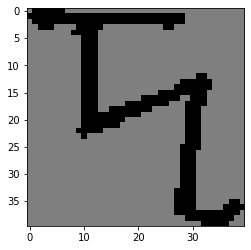

In [126]:
fun()